<a href="https://colab.research.google.com/github/diego-ciciani01/ADM-HW2/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import of Dataset

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d opalskies/large-books-metadata-dataset-50-mill-entries

100% 17.4G/17.4G [03:28<00:00, 132MB/s]
100% 17.4G/17.4G [03:28<00:00, 89.6MB/s]


In [ ]:
!unzip large-books-metadata-dataset-50-mill-entries.zip

Archive:  large-books-metadata-dataset-50-mill-entries.zip
  inflating: authors.json/authors.json  
  inflating: books.json/books.json   
books.json/books.json:  write error (disk full?).  Continue? (y/n/^C) 

In [ ]:
!rm -r /content/books.json

In [ ]:
!wget https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_books.json

--2023-10-18 21:07:19--  https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_books.json
Resolving sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)... 52.95.151.0, 52.95.152.42
Connecting to sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)|52.95.151.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16123393395 (15G) [application/json]
Saving to: ‘lighter_books.json’

lighter_books.json  100%[===================>]  15.02G  21.6MB/s    in 12m 29s 

2023-10-18 21:19:48 (20.5 MB/s) - ‘lighter_books.json’ saved [16123393395/16123393395]



to mount the google drive disk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Research questions [RQs]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm
import seaborn as sns
import shutil
#from datatable import dt, f, by


In [ ]:
path_books_dataset_diego = "/content/drive/MyDrive/Colab Notebooks/università/ADM/Homework_2/dataset/lighter_books.json"
path_authors_dataset_diego = "/content/drive/MyDrive/Colab Notebooks/università/ADM/Homework_2/dataset/lighter_authors.json"

In [ ]:
path_books_dataset_alessio = "/content/drive/MyDrive/Colab Notebooks/hmw2adm/lighter_books.json"
path_authors_dataset_alessio ="/content/drive/MyDrive/Colab Notebooks/hmw2adm/lighter_authors.json"
path_list_dataset_alessio="/content/drive/MyDrive/Colab Notebooks/hmw2adm/list.json"

In [ ]:
path_books_dataset_laura = "/content/drive/MyDrive/Colab Notebooks/ADMHMW2/lighter_books.json"
path_authors_dataset_laura = "/content/drive/MyDrive/Colab Notebooks/ADMHMW2/lighter_authors.json"

[RQ1]

to read the dataset of books with limited rows

In [ ]:
books = pd.read_json(path_books_dataset_diego,lines=True, nrows=200000)
authors = pd.read_json(path_authors_dataset_diego, lines=True)


In [ ]:
books = pd.read_json(path_books_dataset_alessio, lines=True, nrows=200000)


In [ ]:
authors = pd.read_json(path_authors_dataset_alessio, lines=True)

In [ ]:
list0 = pd.read_json(path_list_dataset_alessio, lines=True, nrows=1)

In [ ]:
books = pd.read_json(path_books_dataset_laura, lines=True, nrows=200000)
authors = pd.read_json(path_authors_dataset_laura, lines=True)

this method is used to read a set of specific columns selected of the dataset

In [ ]:
def read_only_columns(path_dataset:str ,columns:list):
  dfs = []
  with open(path_dataset, "r") as file:
    for ch in pd.read_json(file, lines = True, chunksize=20000):
      ch = ch[columns]
      dfs.append(ch)
  df_2 = pd.concat(dfs, ignore_index = True)
  return df_2

In [ ]:
books.head()

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description,newpublication_date,newpublication_date2
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,...,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...,"[2004, 09]","[2004, 09]"
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,...,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...,"[2003, 11, 01]","[2003, 11, 01]"
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,0439554896,9780439554893,,eng,...,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,352,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...,"[2003, 11, 01]","[2003, 11, 01]"
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,,eng,...,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,435,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A...","[2004, 05, 01]","[2004, 05, 01]"
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,...,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...,"[2002, 09, 28]","[2002, 09, 28]"


In [ ]:
authors.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [ ]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199963 entries, 0 to 199962
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         199963 non-null  int64  
 1   title                      199963 non-null  object 
 2   authors                    67568 non-null   object 
 3   author_name                199963 non-null  object 
 4   author_id                  199963 non-null  int64  
 5   work_id                    199963 non-null  int64  
 6   isbn                       199963 non-null  object 
 7   isbn13                     199963 non-null  object 
 8   asin                       199963 non-null  object 
 9   language                   199963 non-null  object 
 10  average_rating             199963 non-null  float64
 11  rating_dist                199963 non-null  object 
 12  ratings_count              199963 non-null  int64  
 13  text_reviews_count         19

In [ ]:
print ("Books dataframe has " + str(books.shape[0]) + "  observations and "  +str(books.shape[1]))
print ("Author dataframe has " + str(authors.shape[0]) + "  observations and " + str(authors.shape[1]))
#shape on dataset will give you the number of row shape[0] and the number of colums shape[1]

Books dataframe has 199963  observations and 26
Author dataframe has 351767  observations and 12


In [ ]:
print("Null value percentage for location dataset")
print(books.isnull().sum()/books.shape[0])
print("\n")
print("Null value percentage for location dataset")
print(authors.isnull().sum()/authors.shape[0])

Null value percentage for location dataset
id                           0.000000
title                        0.000000
authors                      0.662097
author_name                  0.000000
author_id                    0.000000
work_id                      0.000000
isbn                         0.000000
isbn13                       0.000000
asin                         0.000000
language                     0.000000
average_rating               0.000000
rating_dist                  0.000000
ratings_count                0.000000
text_reviews_count           0.000000
publication_date             0.000000
original_publication_date    0.000000
format                       0.000000
edition_information          0.000000
image_url                    0.000000
publisher                    0.000000
num_pages                    0.000000
series_id                    0.000000
series_name                  0.000000
series_position              0.000000
shelves                      0.000000
descrip

In [ ]:
colums_books = ['language', 'format', 'num_pages', 'authors']
colums_selected = books[colums_books]
books_dropna = colums_selected.dropna()
books_dropna.describe()

In [ ]:
books_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54344 entries, 0 to 199959
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   language   54344 non-null  object 
 1   format     54344 non-null  object 
 2   num_pages  54344 non-null  float64
 3   authors    54344 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.1+ MB


Text(0, 0.5, 'Frequencies')

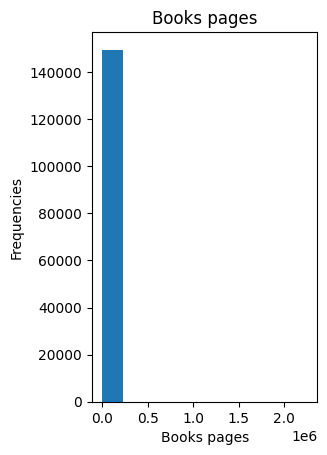

In [ ]:
plt.subplot(1,2,1)
#convert
books['num_pages'] = pd.to_numeric(books['num_pages'], errors='coerce')
plt.hist(books['num_pages'])
plt.title('Books pages')
plt.xlabel('Books pages')
plt.ylabel('Frequencies')


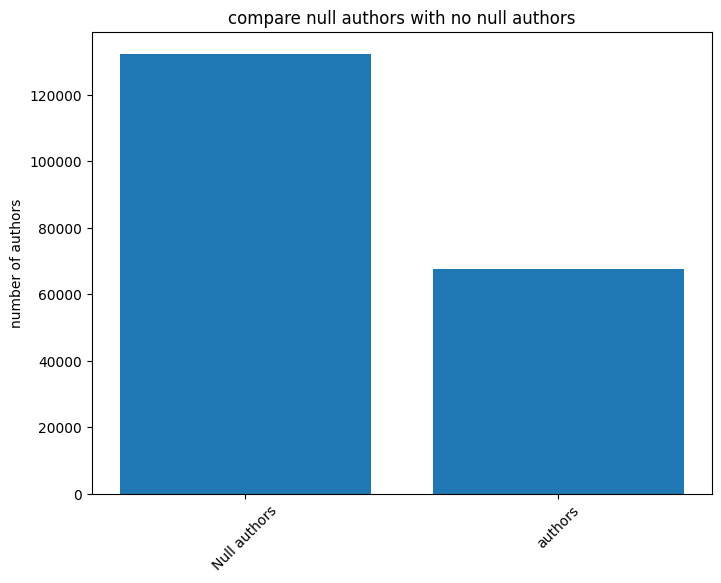

In [ ]:
#author_count = books["authors"].value_counts() ci restituiscre il numero di volte che copoiono gli elementi della colonna
null_authors = books["authors"].isnull().sum()
authors_books = books["authors"].count()
plt.figure(figsize=(8, 6))
plt.bar(["Null authors", "authors"], [null_authors, authors_books])
plt.ylabel("number of authors")
plt.title("compare null authors with no null authors")
plt.xticks(rotation=45)
plt.show()


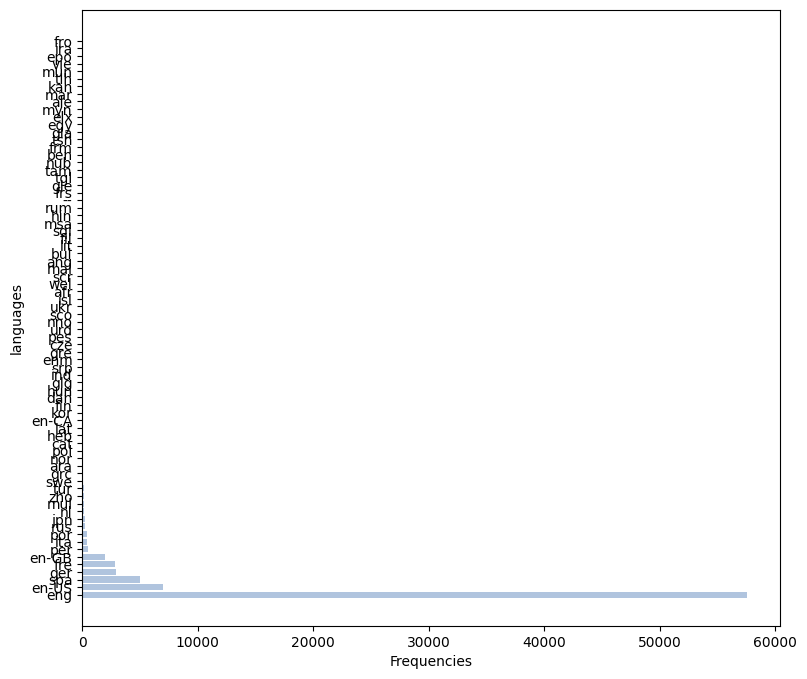

In [ ]:

language = books["language"].dropna()
counts = dict(language.value_counts())
languages = list(counts.keys())[1:75]
values = list(counts.values())[1:75]

plt.figure(figsize=(9, 8))
plt.barh(languages, values, color ='lightsteelblue')
plt.xlabel('Frequencies')
plt.ylabel('languages')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

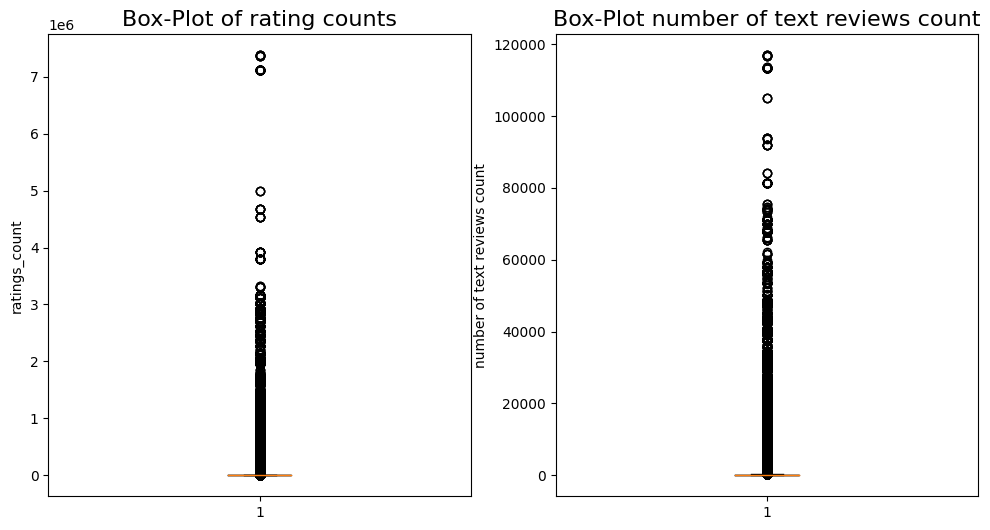

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(books['ratings_count'])
plt.xlabel("")
plt.ylabel("ratings_count")
plt.title("Box-Plot of rating counts", size =16)


plt.subplot(122)
plt.boxplot(books['text_reviews_count'])
plt.xlabel("")
plt.ylabel("number of text reviews count")
plt.title("Box-Plot number of text reviews count", size = 16)



plt.show

AUTHORS

In [ ]:
colums_authors = ['average_rating', 'text_reviews_count', 'fans_count', 'ratings_count']
authors_colums_selected = authors[colums_authors]
authors_colums_selected.describe()

,average_rating,text_reviews_count,fans_count,ratings_count
count,351767.000000,351767.000000,351767.000000,3.517670e+05
mean,3.651194,330.993243,111.615731,4.770586e+03
std,1.211482,3857.539191,2661.018139,9.769395e+04
min,-31.000000,0.000000,-33.000000,-4.100000e+01
25%,3.600000,1.000000,1.000000,6.000000e+00
50%,3.950000,8.000000,4.000000,3.900000e+01
75%,4.250000,53.000000,20.000000,3.100000e+02
max,5.000000,608956.000000,766035.000000,2.700375e+07


Text(0, 0.5, 'Frequencies')

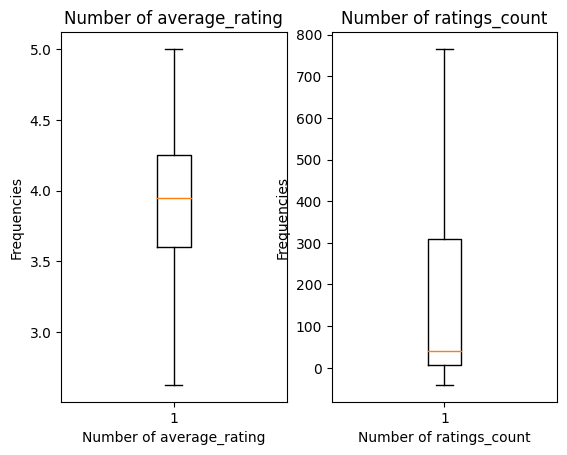

In [ ]:
plt.subplot(1, 2, 1)
plt.boxplot(authors_colums_selected['average_rating'], showfliers= False)
plt.title('Number of average_rating')
plt.xlabel('Number of average_rating')
plt.ylabel('Frequencies')

plt.subplot(1, 2, 2)
plt.boxplot(authors_colums_selected['ratings_count'], showfliers= False)
plt.title('Number of ratings_count')
plt.xlabel('Number of ratings_count')
plt.ylabel('Frequencies')



Text(0, 0.5, 'Frequencies')

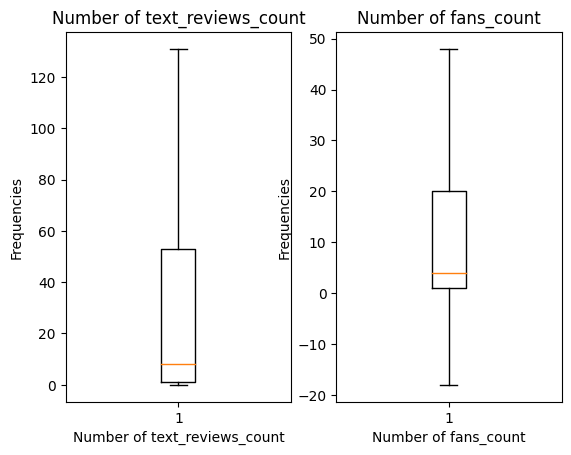

In [ ]:
plt.subplot(1, 2, 1)
plt.boxplot(authors_colums_selected['text_reviews_count'], showfliers= False)
plt.title('Number of text_reviews_count')
plt.xlabel('Number of text_reviews_count')
plt.ylabel('Frequencies')

plt.subplot(1, 2, 2)
plt.boxplot(authors_colums_selected['fans_count'], showfliers= False)
plt.title('Number of fans_count')
plt.xlabel('Number of fans_count')
plt.ylabel('Frequencies')


In [ ]:
ratings_outlier = authors.ratings_count[authors.ratings_count < authors.ratings_count.quantile(.9)]
text_reviews_outlier = authors.text_reviews_count[authors.text_reviews_count < authors.text_reviews_count.quantile(0.9)]


<ipython-input-51-bcb4779259d1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_outlier, hist=True, kde=True,
<ipython-input-51-bcb4779259d1>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text_reviews_outlier, hist=True, kde=True,


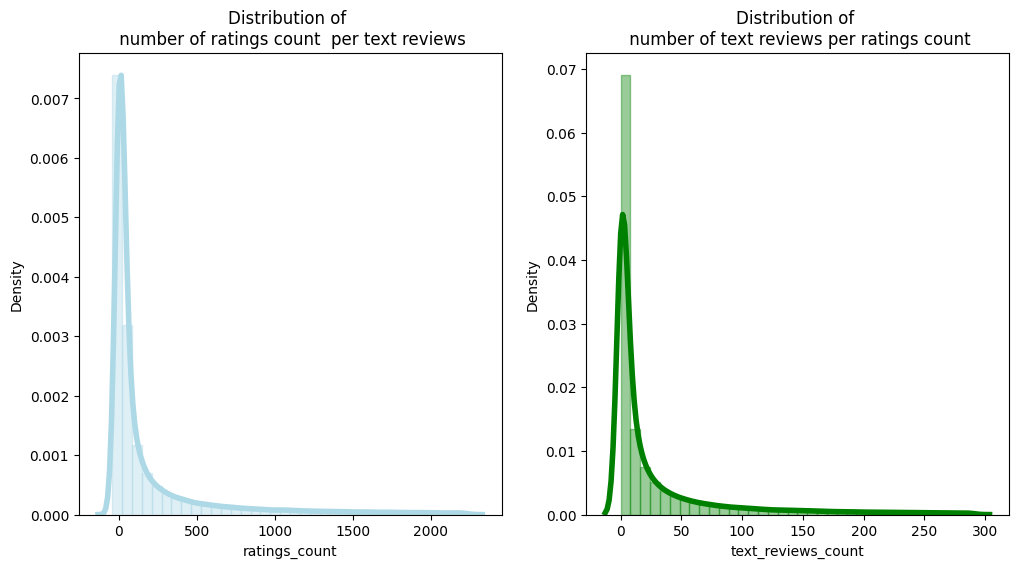

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(ratings_outlier, hist=True, kde=True,
             bins=int(180/5), color = 'lightblue',
             hist_kws={'edgecolor':'lightblue'},
             kde_kws={'linewidth': 4}).set(title='Distribution of \n number of ratings count  per text reviews')
plt.subplot(122)
sns.distplot(text_reviews_outlier, hist=True, kde=True,
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 4}).set(title='Distribution of \n number of text reviews per ratings count')
plt.show()

**[RQ2]**

In [ ]:
books = read_only_columns(path_books_dataset_laura, ['language', 'average_rating', 'num_pages', 'authors', 'average_rating', 'ratings_count'] )

In [ ]:
authors = pd.read_json(path_authors_dataset_laura, lines=True)

*   Plot the number of books for each author in descending order.








In [ ]:
authors.sort_values(by='works_count', ascending=False)

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
83322,115710,4.07,9411,"[45100209, 3628, 1507439, 85644185, 24676995, ...","[25357793, 530270, 1515734, 54883522, 17673542...",1775176,1000834,NOT A BOOK,,https://s.gr-assets.com/assets/nophoto/user/u_...,This profile was created to segregate those it...,4504
213945,8510,4.02,527,"[21723362, 22939358, 22945924, 22579311, 22982...","[15971714, 16706030, 16712573, 16392251, 16739...",186086,5823409,Jesse Russell,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Bookvika Publishing, VSD, Book on Demand Ltd —...",164
155912,8896,4.03,603,"[45374727, 42340520, 64602098, 26803594, 64492...","[25573859, 22795625, 41384870, 18855820, 41284...",186047,3393273,Ronald Cohn,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Bookvika Publishing, VSD, Book on Demand Ltd —...",31
198315,1434041,4.15,78830,"[6405906, 2139868, 3802528, 19119100, 859375, ...","[1923820, 323355, 19351, 280111, 93101, 646462...",182675,5158478,Anonymous,,https://s.gr-assets.com/assets/nophoto/user/u_...,"Books can be attributed to ""Anonymous"" for sev...",2456
187134,431204,3.58,18883,"[189503, 2954048, 15068023, 477, 370900, 11453...","[52357, 3049, 23613, 73419, 381112, 18261, 100...",163434,4699102,Unknown,,https://s.gr-assets.com/assets/nophoto/user/u_...,"Books can be attributed to ""Unknown"" when the ...",1067
...,...,...,...,...,...,...,...,...,...,...,...,...
225259,2,4.50,2,[21540712],[15814300],1,6464608,James D. Roumeliotis,male,https://images.gr-assets.com/authors/134962322...,"James, multilingual and multicultural is a lon...",1
351766,1,5.00,0,[49933850],[29597374],1,16777164,James Ross,,https://s.gr-assets.com/assets/nophoto/user/u_...,<i>Librarian Note: There is more than one auth...,0
123922,0,0.00,0,[],[],0,17146018,Kamryn Hart,female,https://images.gr-assets.com/authors/154145249...,"Kamryn Hart (also known as <a href=""https://ww...",59
57720,0,0.00,0,[],[],0,495244,L. Adams Beck,female,https://images.gr-assets.com/authors/156919099...,"Elizabeth Louisa ""Lily"" Moresby was born on la...",3


*   Which book has the highest number of reviews?

In [ ]:
books.sort_values(by='ratings_count', ascending=False)

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,...,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...
2089,3357,Harry Potter Y La Piedra Filosofal (Harry Pott...,None,J.K. Rowling,1077326,4640799,0613359607,9780613359603,,spa,...,Library Binding,,https://i.gr-assets.com/images/S/compressed.ph...,Turtleback Books,254,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry es húerfano de padre y madre y vive con ...
2653,4255,Harry Potter and the Philosopher's Stone,None,J.K. Rowling,1077326,4640799,,,,eng,...,Hardcover,UK Edition,https://i.gr-assets.com/images/S/compressed.ph...,Bloomsbury Publishing PLC,223,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",When a letter arrives for unhappy but ordinary...
2088,3356,Harry Potter y la piedra filosofal (Harry Pott...,None,J.K. Rowling,1077326,4640799,0320037827,9780320037825,,spa,...,,,https://i.gr-assets.com/images/S/compressed.ph...,,,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter se ha quedado huérfano y vive en ...
30999,49800,Harrius Potter et Philosophi Lapis,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,0747561966,9780747561965,,lat,...,Hardcover,First Edition,https://s.gr-assets.com/assets/nophoto/book/11...,Bloomsbury,249,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63505}, {'name':...",Harrius Potter et Philosophi Lapis Caput Primu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120507,225712,NOT A BOOK: Read Write Inc.: Set 2 Purple: Col...,None,NOT A BOOK,1000834,42596896,0198460015,9780198460015,,,...,Unknown Binding,,https://s.gr-assets.com/assets/nophoto/book/11...,Not Avail,12,,,,[],The language used in the Storybooks is natural...
112412,207832,The Holmes-Sheehan Correspondence: The Letters...,None,Oliver Wendell Holmes Jr.,432185,201157,0823215253,9780823215256,,,...,Hardcover,,https://s.gr-assets.com/assets/nophoto/book/11...,Fordham University Press,96,,,,"[{'name': 'to-read', 'count': 3}]","Oliver Wendell Holmes, Jr., distinguished Amer..."
63392,106845,"Paranoid, or So They Say",None,Alex Robinson,3367778,102984,1585001716,9781585001712,,,...,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Authorhouse,120,,,,[],
112411,207830,"Foundations of Power: John Marshall, 1801-1815...",None,George Lee Haskins,121607,201155,0025413600,9780025413603,,,...,Hardcover,,https://s.gr-assets.com/assets/nophoto/book/11...,MacMillan Publishing Company,,76054,Oliver Wendell Holmes Devise History of the Su...,2,"[{'name': 'to-read', 'count': 5}]",


*   Which are the top ten and ten worst books concerning the average score?




In [ ]:
books.sort_values(by='average_rating', ascending=False)[0:10]

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
177503,354766,Jan's Rainbow: Stories of Hope; How Those We H...,None,Lindsay Collier,203382,344955,1553694120,9781553694120,,,...,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Trafford Publishing,181,,,,[],The anchor story for this book centers on the ...
136399,261611,Everybody Wants to Go to Heaven: Six Steps to ...,"[{'id': '53088', 'name': 'Patrick McDonnell', ...",Patrick McDonnell,53088,253575,0972226206,9780972226202,,,...,Hardcover,,https://s.gr-assets.com/assets/nophoto/book/11...,Sunrise Publishing Company (IL),267,,,,"[{'name': 'to-read', 'count': 6}]",
185617,373152,Airship Aerodynamics: Technical Manual,None,U.S. Department of War,4091154,363069,1410206149,9781410206145,,,...,,,https://s.gr-assets.com/assets/nophoto/book/11...,,,,,,"[{'name': 'to-read', 'count': 7}, {'name': 'cu...",
2694,4316,The Travels of the Prophet Ibrahim (Quran Stor...,"[{'id': '2978', 'name': 'Saniyasnain Khan', 'r...",Saniyasnain Khan,2978,7987,8178980088,9788178980089,,en-US,...,,,https://i.gr-assets.com/images/S/compressed.ph...,,,88052,Quran Stories For Little Hearts,,"[{'name': 'to-read', 'count': 14}]",
136320,261412,The Collected Works Of Samuel Taylor Coleridge...,None,Samuel Taylor Coleridge,11525,253379,0691099545,9780691099545,,,...,Hardcover,,https://s.gr-assets.com/assets/nophoto/book/11...,Princeton University Press,,,,,"[{'name': 'to-read', 'count': 4}]",<br />In his introduction to this edition of C...
101723,183868,Tale of the Missing Head,None,Caroline Leavitt,133325,25642522,0613103106,9780613103107,,,...,Hardcover,,https://s.gr-assets.com/assets/nophoto/book/11...,Turtleback Books,,,,,"[{'name': 'to-read', 'count': 9}]",Wishbone and Sam investigate the disappearance...
136319,261410,Sir Henry Irving: A Victorian Actor and His World,None,Jeffrey Richards,18142,253377,1852855916,9781852855918,,,...,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Bloomsbury Academic,508,,,,"[{'name': 'to-read', 'count': 6}]",Sir Henry Irving was the greatest actor of the...
101782,184017,Mad About The Boy: The Life And Times Of Boy G...,None,Anton Gill,62114,177844,003003003X,9780030030031,,,...,Unknown Binding,,https://s.gr-assets.com/assets/nophoto/book/11...,Holt McDougal,,,,,"[{'name': 'to-read', 'count': 2}]",
185535,372926,Public Speaking: A Guide for the Engaged Commu...,"[{'id': '212650', 'name': 'Paul E. Nelson', 'r...",Paul E. Nelson,212650,362843,0073112623,9780073112626,,,...,,,https://s.gr-assets.com/assets/nophoto/book/11...,,,,,,"[{'name': 'to-read', 'count': 3}]","This is a new, brief, economical text that str..."
185534,372925,Public Speaking with Student CD-ROM and PowerWeb,"[{'id': '212650', 'name': 'Paul E. Nelson', 'r...",Paul E. Nelson,212650,362843,0073212776,9780073212777,,,...,,,https://s.gr-assets.com/assets/nophoto/book/11...,,,,,,"[{'name': 'to-read', 'count': 3}]",


*   Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

In [ ]:
len = books[books['language'].str.strip() != '']
language_counts = len['language'].value_counts()

In [ ]:
print(language_counts)

eng      57525
en-US     6963
spa       5041
ger       2884
fre       2822
         ...  
ira          1
mun          1
ale          1
gla          1
fro          1
Name: language, Length: 74, dtype: int64


In [ ]:
books['language'].value_counts()

         119962
eng       57525
en-US      6963
spa        5041
ger        2884
          ...  
mun           1
vie           1
epo           1
ira           1
fro           1
Name: language, Length: 75, dtype: int64

In [ ]:
books['language'].value_counts()

         119962
eng       57525
en-US      6963
spa        5041
ger        2884
          ...  
mun           1
vie           1
epo           1
ira           1
fro           1
Name: language, Length: 75, dtype: int64

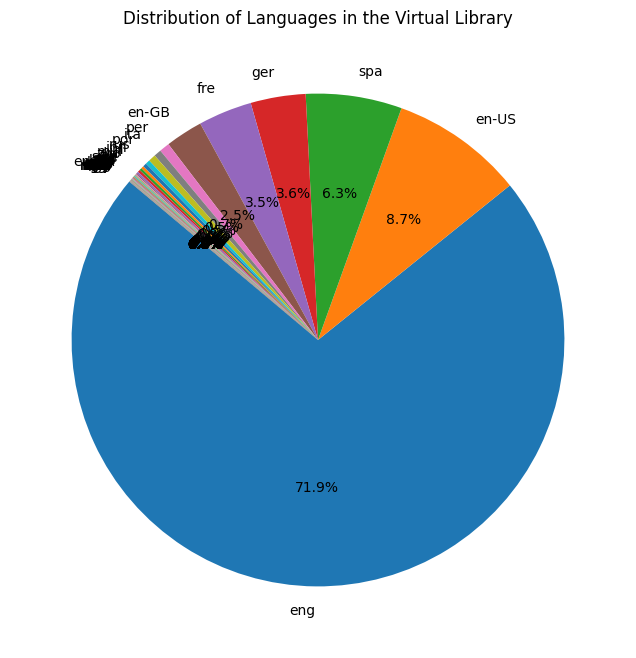

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Languages in the Virtual Library')

plt.show()

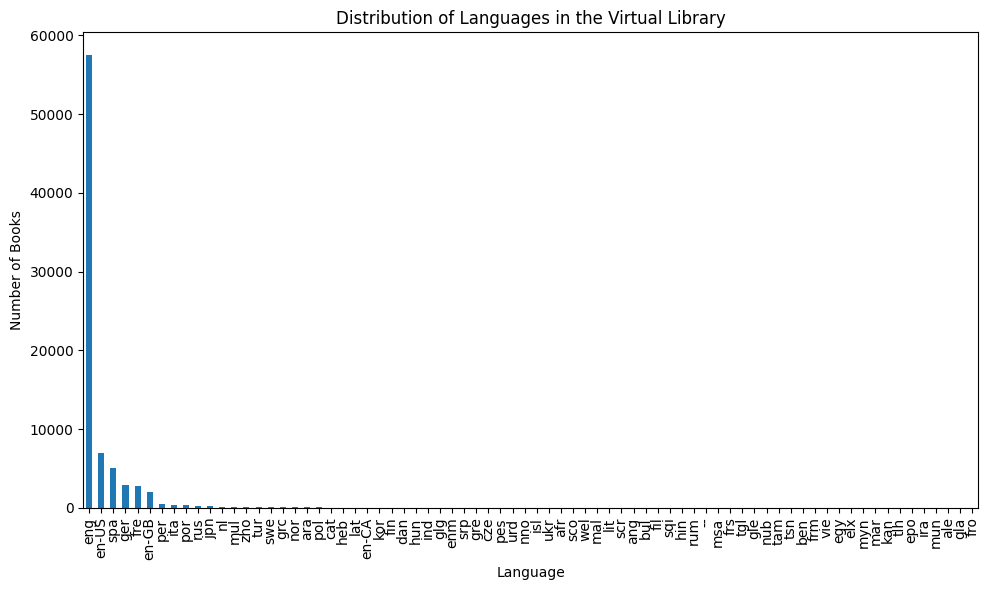

In [ ]:
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.title('Distribution of Languages in the Virtual Library')

plt.xticks(rotation=90)  # Rotate language labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure

plt.show()

qua servirebbe ovviamente fare il cleaning dil dataset perche la prima lingua sono i libri che non hanno lingua

In [ ]:
books['num_pages']

0         870
1         309
2         352
3         435
4         734
         ... 
199958    419
199959    892
199960    420
199961    352
199962    544
Name: num_pages, Length: 199963, dtype: object

In [ ]:
books = books[books['num_pages'] != '']
len(books[books['num_pages'].astype(int) > 250])

78351

In [ ]:
countbooks = authors['name'].value_counts()
top50 = countbooks.head(50)
top50books = authors[authors['name'].isin(top50.index)]

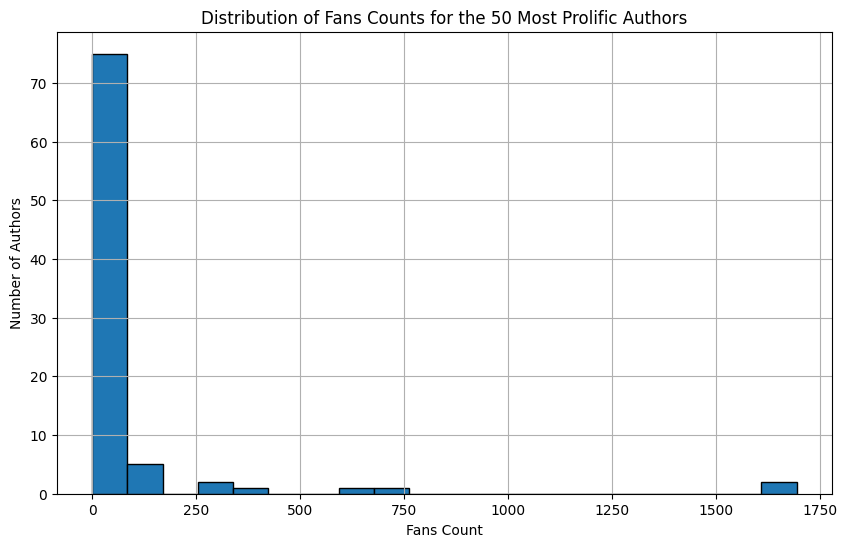

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(top50books['fans_count'], bins=20, edgecolor='k')
plt.xlabel('Fans Count')
plt.ylabel('Number of Authors')
plt.title('Distribution of Fans Counts for the 50 Most Prolific Authors')
plt.grid(True)

plt.show()

[RQ3]

In [ ]:
books_short = read_only_columns(path_books_dataset_diego, ['publication_date', 'num_pages'])

In [ ]:
def abount_books(books, year):
  data_output = {}

  books_published = books['publication_date']
  books_published = books[books['publication_date'] != '3002-08-21 00:00:00']

  books_published['publication_date'] = pd.to_datetime(books_published['publication_date'], format='%Y-%m-%d', errors='coerce')

  books_published['publication_date_year'] = books_published['publication_date'].dt.year
  books_published['publication_date_year'] = books_published['publication_date_year'].replace('', pd.NA)
  books_published['publication_date_year'] = books_published['publication_date_year'].fillna(0).astype(int)
  books_published['publication_date_month'] = books_published['publication_date'].dt.month
  books_published_in_year =  books_published[books_published['publication_date_year'] == int(year)]
  number_of_books_published = len(books_published_in_year)
  data_output["number_of_books_published"] = number_of_books_published

  #sum_total_pages
  books_published_in_year['num_pages'] = books_published_in_year['num_pages'].replace('', pd.NA)
  books_published_in_year['num_pages'] = books_published_in_year['num_pages'].fillna(0).astype(int)
  sum_total_pages = sum(books_published_in_year['num_pages'])
  data_output["sum_total_pages"] = sum_total_pages

  #The most prolific month of that year.
  most_prolific_month =books_published_in_year['publication_date_month'].value_counts().idxmax()
  data_output['most_prolific_month'] = most_prolific_month

  #The longest book written that year.
  longhest_book_year = max(books_published_in_year['num_pages'])
  data_output['longhest_book_year'] = longhest_book_year

  return data_output

In [ ]:
output=  abount_books(books, '2002')


<ipython-input-37-2907de699bd9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_published_in_year['num_pages'] = books_published_in_year['num_pages'].replace('', pd.NA)
<ipython-input-37-2907de699bd9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_published_in_year['num_pages'] = books_published_in_year['num_pages'].fillna(0).astype(int)


RQ3.2

In [ ]:
year_start = int(input())
year_end  = int(input())
data = {}
for y in range(year_start,year_end):
   data_output = abount_books(books, str(y))
   data[y] = [data_output.values()]
df = pd.DataFrame(data)
print(df.head(10))
print(df.tail(10))

2001
2002
                         2001
0  (9160, 2412621, 1.0, 4330)
                         2001
0  (9160, 2412621, 1.0, 4330)


<ipython-input-37-2907de699bd9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_published_in_year['num_pages'] = books_published_in_year['num_pages'].replace('', pd.NA)
<ipython-input-37-2907de699bd9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_published_in_year['num_pages'] = books_published_in_year['num_pages'].fillna(0).astype(int)


RQ3.3

In [ ]:
data_list = []
for year in range(2000, 2005):
    data_list.append({'Year': year, **abount_books(books, str(year))})
result_df = pd.DataFrame(data_list)
print(result_df.head(10))
print(result_df.tail(10))

<ipython-input-42-1489cb05825e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_published_in_year['num_pages'] = books_published_in_year['num_pages'].replace('', pd.NA)
<ipython-input-42-1489cb05825e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_published_in_year['num_pages'] = books_published_in_year['num_pages'].fillna(0).astype(int)
<ipython-input-42-1489cb05825e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

   Year  number_of_books_published  sum_total_pages  most_prolific_month  \
0  2000                       8260          2124461                  1.0   
1  2001                       9160          2412621                  1.0   
2  2002                      10286          2739470                  1.0   
3  2003                      11016          2941521                  1.0   
4  2004                      12162          3168284                  1.0   

   longhest_book_year  
0                5148  
1                4330  
2                3700  
3                5462  
4                9998  
   Year  number_of_books_published  sum_total_pages  most_prolific_month  \
0  2000                       8260          2124461                  1.0   
1  2001                       9160          2412621                  1.0   
2  2002                      10286          2739470                  1.0   
3  2003                      11016          2941521                  1.0   
4  2004            

<ipython-input-42-1489cb05825e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_published_in_year['num_pages'] = books_published_in_year['num_pages'].replace('', pd.NA)
<ipython-input-42-1489cb05825e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_published_in_year['num_pages'] = books_published_in_year['num_pages'].fillna(0).astype(int)


In [ ]:
books['newpublication_date'] = books['publication_date'].str.split('-')
books['newpublication_date2'] = books['publication_date'].str.split('-')
num = pd.to_numeric(books['num_pages'], errors='coerce')
def conta(year):
  sum=0
  num_pages=0
  maxx=0
  for x in range(len(books.newpublication_date)):
    if books.newpublication_date[x][0]==str(year):
      sum+=1
      num_pages+=num[x]
  return sum,num_pages
conta(2003)





(11016, nan)

In [ ]:
type(books['publication_date'][0][0])
numeric_series = pd.to_numeric(books['num_pages'], errors='coerce')


In [ ]:
numeric_series

0         870.0
1         309.0
2         352.0
3         435.0
4         734.0
          ...  
199958    419.0
199959    892.0
199960    420.0
199961    352.0
199962    544.0
Name: num_pages, Length: 199963, dtype: float64

In [ ]:
num[0]+num[1]

1179.0

In [ ]:
books['publication_date'][0][0]

'2'

Q4

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37326 (\N{CJK UNIFIED IDEOGRAPH-91CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30001 (\N{CJK UNIFIED IDEOGRAPH-7531}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


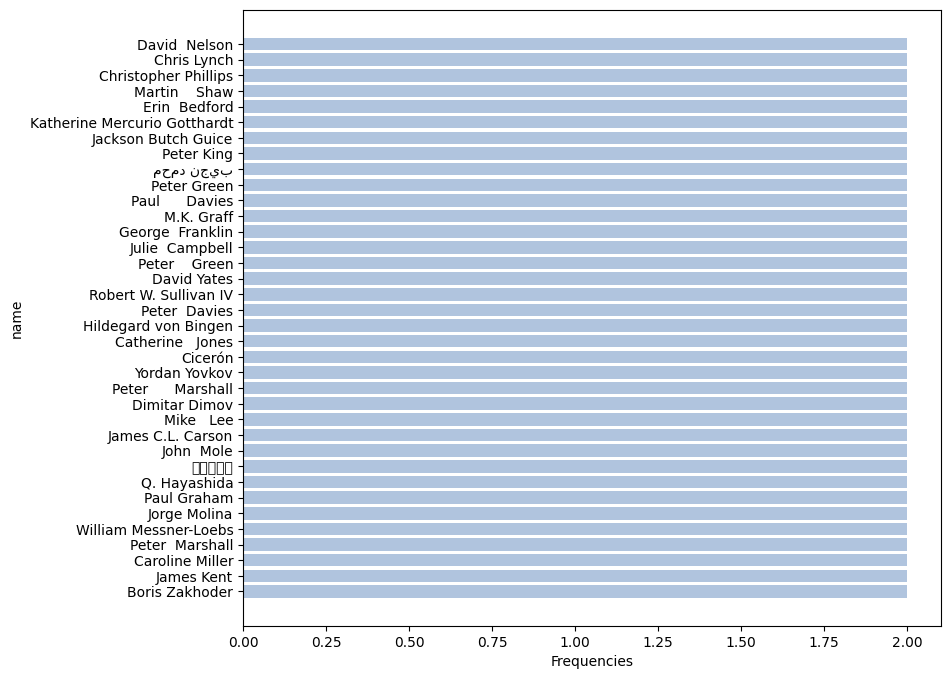

In [ ]:
author_name =  dict(authors["name"].value_counts())
repeted_name = {}
for x,y in author_name.items():
    if y>= 2:
      repeted_name[x] = y

name = list(repeted_name.keys())[1:37]
values = list(repeted_name.values())[1:37]
plt.figure(figsize=(9, 8))
plt.barh(name, values, color ='lightsteelblue')
plt.xlabel('Frequencies')
plt.ylabel('name')
plt.show()


false

In [ ]:
books_short_columns = read_only_columns(path_books_dataset_diego,['author_id', 'id', 'title'])

In [ ]:
authors_short_columns = read_only_columns(path_authors_dataset_diego,['average_rating', 'id', 'name'])

Q4.2

In [ ]:
def find_books_byId(authors_id, books):
  my_dict = {}
  count =0
  for i in authors_id:
    for j in books_short_columns["author_id"]:
    #cerca nella colonna author_id nel dataset books
      if i == j:
        my_dict[i] =  books_short_columns.loc[books_short_columns['author_id'] == i, 'title']

  return my_dict


In [ ]:

id1 = []
for i in range(3):
  id1.append(books_short_columns.author_id[random.randint(0, books_short_columns.shape[0])])


In [ ]:
#my_dict = find_books_byId(authors['id'], books)

def check_test(authors_id, books):
  #correct = books[books.author_id == np.float64(authors_id)].shape[0]
  test = find_books_byId(authors_id, books_short_columns)
  return test

In [ ]:
test_dict = check_test(id1, books_short_columns)

Q4.3

In [ ]:
def get_longest_book(top_authors, books):
  title_books=set()
  for i in top_authors['id']:
    for j in books['author_id']:
      if i == j:
        title = (books_short_columns.loc[books_short_columns['author_id'] == i, 'title']).values[0]
        title_books.add(title)
  return title_books

In [ ]:
top_authors = authors_short_columns.sort_values('average_rating', ascending=False).head(21)

In [ ]:
title_books = get_longest_book(top_authors, books_short_columns)

NameError: ignored

Titles books are saved in python set, so we know that the first element is the longhest of all set, (ordered by default)

In [ ]:
title_books

{'Arkitektڳur ڳa ڳislandi, Leiڎarvڳisir = Architekturfںuhrer Island = Architectural Guide To Iceland',
 'Attack Of The Gas Powered Angels',
 'Bomb',
 'Broken Mirror',
 'Educating the Royal Navy: 18th and 19th Century Education for Officers',
 'Fantastic Illusions of Life, Love, the Birds, and the Bees',
 'Help with the Hard Stuff: Workbooks for Teens with Type I Diabetes and Their Parents',
 'History of the postage stamps of the United States of America',
 'Initiation (Best Kept Secret)',
 'My Mystery Child',
 'Readings in child development',
 'Sara Rose, Kid Lawyer',
 'Strange Loops',
 'The Lovable Rogue Mysteries',
 'The Migraine Diaries #1: Diagnosis [1981]',
 'You Have the Nerve to Call Yourself a Roman Catholic!',
 'Übungen für Junge Mathematiker : Teil 4 Gleichungen (Mathematische Schülerbücherei, #87)'}

In [ ]:
books_short_columns['max_lung'] = books_short_columns['title'].apply(len)
max_book_all_dataset = books_short_columns.loc[books_short_columns['max_lung'].idxmax()]['title']


Instead the longhest book of dataset is :

In [ ]:
max_book_all_dataset

'The New England Primer Issued Prior to 1830: A Bibliographical Checklist for the More Easy Attaining the True Knowledge of This Book, Embellished with a Hundred Cuts and Now Revised, Greatly Improved and Arranged in Two Alaphabets; With Preface, Introd...'

RQ4.4

In [ ]:
books_short_columns['min_lung'] = books_short_columns['title'].apply(len)
min_book_all_dataset = books_short_columns.loc[books_short_columns['min_lung'].idxmin()]['title']

In [ ]:
min_book_all_dataset

''

the shortest books of dataset is an empty string

[RQ5]

In [ ]:
authors['num_books']=authors['book_ids'].apply(lambda x : len(x))
top_ten=authors.sort_values(by=['fans_count','num_books'],ascending=False)[:10]

In [ ]:
mergetop_ten=pd.merge(top_ten,books,left_on='id',right_on='author_id',how='inner')
authors_series=mergetop_ten[mergetop_ten['series_id'].str.strip() != '']
authors_series['len_series_name']=authors_series['series_name'].apply(lambda x : len(x))
authors_series['series_name'][authors_series['len_series_name']==max(authors_series['len_series_name'])].iloc[0]
#authors_series['series_name'].max()

<ipython-input-5-3c95f3c8a3a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors_series['len_series_name']=authors_series['series_name'].apply(lambda x : len(x))


'Percy Jackson and the Olympians'

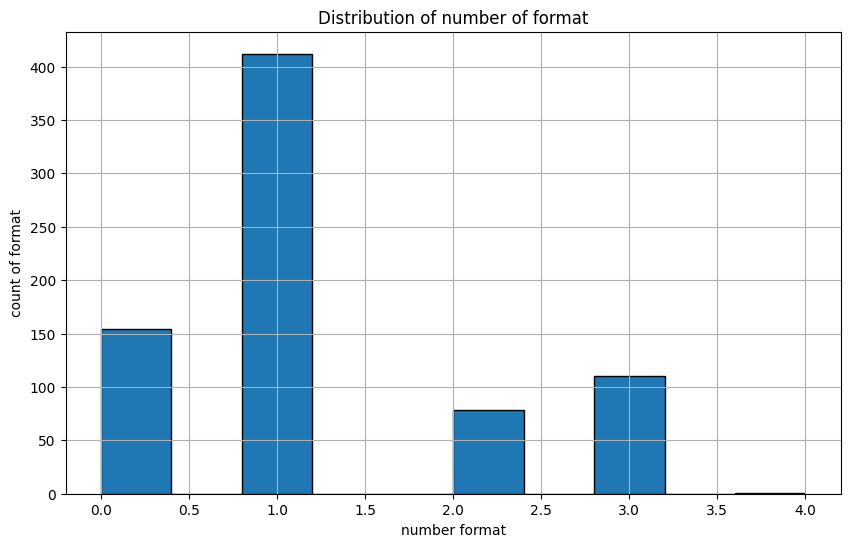

In [ ]:
sum(mergetop_ten['format'].str.split().apply(lambda x : len(x))>1)
num_format=mergetop_ten['format'].str.split().apply(lambda x : len(x))


plt.figure(figsize=(10, 6))

plt.hist(num_format, bins=10, edgecolor='k')
plt.xlabel('number format')
plt.ylabel('count of format')
plt.title('Distribution of number of format')
plt.grid(True)

plt.show()

In [ ]:
colums_response_from_readers = ['average_rating', 'text_reviews_count', 'fans_count', 'ratings_count']
authors_colums_response_from_readers = authors[colums_response_from_readers]
authors_colums_response_from_readers.describe()

,average_rating,text_reviews_count,fans_count,ratings_count
count,351767.000000,351767.000000,351767.000000,3.517670e+05
mean,3.651194,330.993243,111.615731,4.770586e+03
std,1.211482,3857.539191,2661.018139,9.769395e+04
min,-31.000000,0.000000,-33.000000,-4.100000e+01
25%,3.600000,1.000000,1.000000,6.000000e+00
50%,3.950000,8.000000,4.000000,3.900000e+01
75%,4.250000,53.000000,20.000000,3.100000e+02
max,5.000000,608956.000000,766035.000000,2.700375e+07


In [ ]:
authors.groupby(['gender']).iloc['female']

AttributeError: ignored

RQ 5.4

In [ ]:
gender= authors['gender'].value_counts()

In [ ]:
general_stats = authors.agg({
    "fans_count": "sum",
    "average_rating": "mean",
    "text_reviews_count": "sum"
})

general_stats_groupby = authors.groupby('gender').agg({
    "fans_count": "sum",
    "average_rating": "mean",
    "text_reviews_count": "sum"
})



In [ ]:
general_stats

fans_count            3.926273e+07
average_rating        3.651194e+00
text_reviews_count    1.164325e+08
dtype: float64

In [ ]:
general_stats_groupby

,fans_count,average_rating,text_reviews_count
gender,,,
,6139338,3.509177,18650927
(He/Him),6,4.500000,8
-,2,5.000000,0
AMAB,1,5.000000,0
Adrogynous,0,0.000000,0
...,...,...,...
transmasculine,68,3.816667,74
transsexual female,2,5.000000,0
two-spirit,1,5.000000,0


for this point all genders were considered, alternatively the two main genders could be kept (male and female) while all the others were put under another label for example other

[RQ6]

1.Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

In [ ]:
books_short = read_only_columns(path_books_dataset_diego, ["author_id", "original_publication_date", "series_id", "work_id"])
authors_short = read_only_columns(path_authors_dataset_diego, ['id','book_ids','fans_count','name'])

get top 10 authors

In [ ]:
authors['num_books']=authors['book_ids'].apply(lambda x : len(x))
top_ten = authors.sort_values(by=['fans_count','num_books'],ascending=False)[:10]

In [ ]:
books['newpublication_date'] = books['original_publication_date'].str.split('-')
mergetop_ten=pd.merge(top_ten,books,left_on='id',right_on='author_id',how='inner')

[QS] 6.1

In [ ]:
mergetop_ten = mergetop_ten[(mergetop_ten['original_publication_date'] >= '1678-01-01') & (mergetop_ten['original_publication_date'] <= '2262-04-11')]


In [ ]:
mergetop_ten["original_publication_date"] = pd.to_datetime(mergetop_ten['original_publication_date'])


In [ ]:
mergetop_ten = mergetop_ten.sort_values(by=['series_id', 'original_publication_date'])


In [ ]:
mergetop_ten = mergetop_ten.drop_duplicates(subset = ['work_id'])


In [ ]:
mergetop_ten['time_diff'] = mergetop_ten.groupby('series_id')['original_publication_date'].diff().dt.days
mergetop_ten = mergetop_ten.dropna()
mean_mergetop_ten = mergetop_ten.groupby('name')['time_diff'].mean()


we got the evarage day of pubblication of each authorsù


In [71]:

def extract_year(date):
    if len(date) == 3:  # Full date format [YYYY, MM, DD]
        if len(date[0]) == 4:
            return date[0]
        else: return None
    elif len(date) == 2:  # Year and month format [YYYY, MM]
        return date[0]
    elif len(date) == 1:  # Year format [YYYY]
        if len(date[0]) == 4:
            return date[0]
        else: return None
    else:
        return None  # Handle other formats if necessary

# Apply the custom function to create a new 'Year' column
mergetop_ten['newpublication_date'] = mergetop_ten['newpublication_date'].apply(extract_year)

In [72]:
mergetop_ten['newpublication_date'] = pd.to_numeric(mergetop_ten['newpublication_date'], errors='coerce').astype('Int64')
mergetop_ten_series = mergetop_ten.sort_values(by=['series_id', 'newpublication_date'])
mergetop_ten_series = mergetop_ten_series.drop_duplicates(subset = ['work_id'])
mergetop_ten_series = mergetop_ten_series.dropna()

In [73]:
mergetop_ten_series['time_diff'] = mergetop_ten_series.groupby('series_id')['newpublication_date'].diff()
mergetop_ten_series = mergetop_ten_series.dropna()
average_time_diff_by_author = mergetop_ten_series.groupby('name')['time_diff'].mean()

In [74]:
mergetop_ten_nonseries = mergetop_ten[mergetop_ten['series_id'] == '']
mergetop_ten_nonseries = mergetop_ten_nonseries.sort_values(by='newpublication_date')
mergetop_ten_nonseries['time_diff'] = mergetop_ten_nonseries['newpublication_date'].diff()
average_time_diff_by_author_nonseries = mergetop_ten_nonseries.groupby('name')['time_diff'].mean()

In [75]:
average_time_diff_by_author

name
Bill  Gates                 0.0
Cassandra Clare        0.326923
Colleen Hoover         0.818182
James Patterson        0.380952
John Green             0.166667
Mindy Kaling                0.0
Neil deGrasse Tyson         0.0
Rick Riordan               0.58
Stephen King           0.298507
Veronica Roth               0.2
Name: time_diff, dtype: Float64

In [76]:
average_time_diff_by_author_nonseries

name
Bill  Gates                 0.0
Cassandra Clare             0.2
Colleen Hoover         0.333333
James Patterson         0.04878
John Green                 0.25
Mindy Kaling                0.0
Neil deGrasse Tyson       0.125
Rick Riordan                0.0
Stephen King           0.154639
Veronica Roth               0.0
Name: time_diff, dtype: Float64

Difference between average time difference between the publication of books that are in a series and books that are not is

[RQ7]

RQ 7.1


In [ ]:

books['stars>4']=(books['average_rating']>4)*books['ratings_count']
books_grouped=books.groupby('work_id')
number_reviews=books_grouped['ratings_count'].sum()
reviews_greater=books_grouped['stars>4'].sum()
percentage_greater=reviews_greater/number_reviews
probability=(percentage_greater>0.3).mean()
probability



0.3994325905786394

The probability that a book has over 30% of the ratings above 4 is equal to 0.3994325905786394

RQ 7.2


In [ ]:


books_clean=books.drop_duplicates(subset=['work_id'])

books_clean['original_publication_date'] = pd.to_datetime(books_clean['original_publication_date'], format='%Y-%m-%d', errors='coerce')

books_clean['original_publication_date'] = books_clean['original_publication_date'].replace('', np.nan)
books_clean = books_clean.dropna(subset=['original_publication_date'])

curr2_cleansort = books_clean.sort_values(by='original_publication_date', ascending=True)


curr2_cleansort['date_difference'] = (curr2_cleansort.groupby('author_name')['original_publication_date'].diff() / np.timedelta64(1, 'D')).clip(upper=730)
probability_book_withintwoyears = 1 - (curr2_cleansort['date_difference'].isna().sum() / len(curr2_cleansort['date_difference']))
probability_book_withintwoyears

<ipython-input-91-6062dacb033c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_clean['original_publication_date'] = pd.to_datetime(books_clean['original_publication_date'], format='%Y-%m-%d', errors='coerce')
<ipython-input-91-6062dacb033c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_clean['original_publication_date'] = books_clean['original_publication_date'].replace('', np.nan)


0.6814565483476132

The probability that an author publishes a new book within two years from its last work is equal to 0.6814565483476132.

RQ 7.3


In [ ]:
listtitle=[]
for x in range(len(list0['books'][0])) :
  listtitle.append(list0['books'][0][x]['title'])
books['num_pages']=books['num_pages'].replace('',np.nan)
books=books.dropna(subset='num_pages')
listid=[]
for x in range(len(list0['books'][0])) :
  listtitle.append(list0['books'][0][x]['book_id'])


probX_given_Y=sum(books[books['num_pages']>700]['title'].isin(listtitle))/sum(books['num_pages']>700)
probX_given_Y


0.08360337005832794

probX_given_Y is the probabilty of a book being included in this list
knowing it has more than 700 pages.

RQ 7.4


In [ ]:
probX=books['title'].isin(listtitle).mean()
probY=(books['num_pages']>700).mean()

probX*probY

probY


0.03752492072199847

In [ ]:
probX_Y=sum(books[books['num_pages']>700]['title'].isin(listtitle))/len(books)
probX_Y



0.0023214739687169674

The events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ are not independent because the product of the probabilities of the 2 events probX*probY is different from the probabilty of the intersection of the 2 events probX_Y
so for that we can conclude that the 2 events are not independent.

[RQ8]

RQ 8.1

In [ ]:
rating_longbooks=books[books['num_pages']>700]['average_rating']
rating_notlongbooks=books[books['num_pages']<700]['average_rating']
meanrating_longbooks=rating_longbooks.mean()
meanrating_notlongbooks=rating_notlongbooks.mean()
ttest_ind(rating_longbooks,rating_notlongbooks,alternative='greater')



TtestResult(statistic=29.638964933865132, pvalue=4.4011844423208166e-192, df=65437.0)

Since the p_value is equal to 4.4011844423208166e-192 and therefore less than the threshold level of 0.05 we reject the null hypothesis that readers usually rate the longest books as the worst

RQ 8.2


In [ ]:
from scipy.stats import ttest_ind
books['language']=books['language'].replace('',np.nan)
books=books.dropna(subset='language')
ratings_eng=books[(books['language']=='en-US') | (books['language']=='eng') | (books['language']=='en-GB') | (books['language']=='en-CA')]['average_rating']
ratings_noteng=books[books['language']!='eng']['average_rating']
mean_eng=ratings_eng.mean()
t_statistic, p_value = ttest_ind(ratings_eng, ratings_noteng)
p_value

6.223276978997408e-17

Since the p_value is equal to 6.223276978997408e-17 and therefore less than the threshold level of 0.05 we reject the null hypothesis that the average rate distribution for English and non-English books are the same

RQ 8.3


{'whiskers': [<matplotlib.lines.Line2D at 0x794c2d8acaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x794c2d8ada50>,
 'boxes': [<matplotlib.lines.Line2D at 0x794c2d8acbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x794c2d8adba0>],
 'fliers': [<matplotlib.lines.Line2D at 0x794c2d8ae200>],
 'means': []}

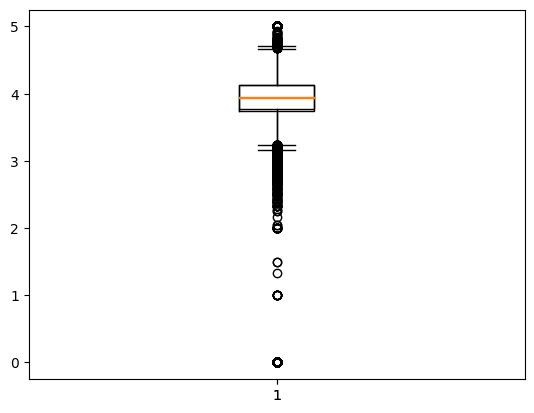

In [ ]:
ratings_eng.describe()
ratings_noteng.describe()
ratings_eng.mode()
ratings_noteng.mode()
plt.boxplot(ratings_eng)
plt.boxplot(ratings_noteng)

RQ 8.4


In [ ]:
from scipy.stats import pearsonr
authors=authors[authors['ratings_count']>0]
authors=authors[authors['fans_count']>0]
correlation, p_value = pearsonr(authors['ratings_count'], authors['fans_count'])
correlation



0.5805966932178679

The authors with more fans have more reviews and we can see this from the positive value of the Pearson correlation coefficient 0.5805966932178679 between 'ratings_count' e 'fans_count'. A positive value suggests that as the number of fans increases, the number of ratings tends to increase as well.

In [ ]:
authors['rapp_ratingfan']=authors['ratings_count']/authors['fans_count']
authors_famous=authors.sort_values('fans_count',ascending=False)[:9000]
authors_notfamous=authors.sort_values('fans_count',ascending=False)[9000:]
authors_famous['rapp_ratingfan'].mean()
authors_notfamous['rapp_ratingfan'].mean()
t_statistic, p_value = ttest_ind(authors_notfamous['rapp_ratingfan'], authors_famous['rapp_ratingfan'])
p_value


0.032770157773054594

Since the p_value is equal to 0.032770157773054594 and therefore less than the threshold level of 0.05 we reject the null hypothesis that authors with more fans have the same amount of review in % of the others authors and we can see this also because the mean of 'rapp_ratingfan' is 47.098003222063106 instead in the rest of the population is 75.94711800159497 so we can confirm that the fans of the authors with more fans are a bit lazy.

RQ 8.5

Some helpful statistical tests in data analysis and mining are:T-Test,Chi-Square Test,Regression Analysis,Correlation Analysis,Cluster Analysis,Time Series Analysis,Principal Component Analysis (PCA),Logistic Regression and others.


*   T-Test is used to compare the means of two groups and determine if there is a significant difference between them.
*   Chi-Square Test is used to assess the independence of two categorical variables and determine if they are related or not.


*   Regression Analysis is used to establish a relationship between one or more independent variables and a dependent variable.
*   Correlation Analysis is used to measure the intensity and direction of a linear relationship between two continuous variables.


*   Cluster Analysis is used to group similar data points into clusters based on their characteristics or features.
*   Time Series Analysis is used to analyze data points collected over time to identify trends, seasonality, and forecast future values.

*   Principal Component Analysis (PCA) is used to reduce the dimensionality of data while retaining important information.
*   Logistic Regression is used to model and predict binary outcomes.

We can divide the statistical tests in 2 broad categories parametric and nonparametric tests the choice between them depends on the characteristics of the data and the assumptions that you can or want to make. In parametric tests we assume that the data follows a specific probability distribution, often the normal distribution. We have to use this type of statistical test the data meets the assumptions because parametric tests are sensitive to violations of their assumption and if the data doesn't meet the assumptions, the results will be inaccurate. Advantages of parametric test are that: parametric tests are often more powerful, meaning they can detect smaller effects and they provide more precise estimates of population parameters. Nonparametric tests do not make specific assumptions about the underlying data distribution so they are distribution-free tests. An advantage is that they can be used when the underlying data distribution is unknown or hard to determine. Disadvantages are that: nonparametric tests are generally less powerful than parametric tests when the data does meet the assumptions and they might require larger sample sizes to detect the same effects,
they provide less precise estimates of population parameters.

So to sum up if your data closely follows a known distribution and meets the assumptions of parametric tests, it's generally best to use parametric tests for their greater statistical power. If the data doesn't meet these assumptions, nonparametric tests are more appropriate. Nonparametric tests are also more suitable for small sample sizes because they are robust and do not require the same assumptions as parametric tests and nonparametric tests  are also preferred when dealing with outliers or skewed data because they are less affected by extreme values.











Command Line Question (CLQ)

move the dataset

In [ ]:
shutil.copy("/content/drive/MyDrive/Colab Notebooks/università/ADM/Homework_2/dataset/series.json/series.json", "/content/")

'/content/series.json'

In [ ]:
!cat series.json | awk 'END {print NR}'


226659


install JQ

In [ ]:
!apt-install jq

In [ ]:
!cat series.json | jq -r 'select(.works) | .works |= map(select(.books_count)) | {id: .id, title: .title, total_books: (.works | map(.books_count | tonumber) | add)}' | jq -s 'sort_by(-.total_books) | .[:5]'


[
  {
    "id": "302380",
    "title": "Extraordinary Voyages",
    "total_books": 20138
  },
  {
    "id": "94209",
    "title": "Alice's Adventures in Wonderland",
    "total_books": 14280
  },
  {
    "id": "311348",
    "title": "Kolekcja Arcydzieł Literatury Światowej",
    "total_books": 13774
  },
  {
    "id": "41459",
    "title": "Oz",
    "total_books": 11519
  },
  {
    "id": "51138",
    "title": "Hercule Poirot",
    "total_books": 11305
  }
]


AWS Question (AWSQ)

In [ ]:
import time

In [ ]:
start_time = time.time()

In [ ]:
tags_df = read_only_columns("/content/drive/MyDrive/Colab Notebooks/università/ADM/Homework_2/dataset/list.json", ['tags'])


In [ ]:
all_tags = []
for index, row in short_tags_dataset.iterrows():
    tags = row['tags']
    if isinstance(tags, list):  # Check if tags is a list
        all_tags.extend(tags)


In [ ]:
tag_count = pd.Series(all_tags).value_counts()

In [ ]:
tag_counts = tag_count.astype(int)

In [ ]:
tag_counts = tag_counts.sort_values(ascending=False)

In [ ]:
top_tags = tag_counts.head(5)

In [ ]:
top_tags

romance            6001
fiction            5291
young-adult        5016
fantasy            3666
science-fiction    2779
dtype: int64

In [ ]:
end_time = time.time()


In [ ]:
print(end_time - start_time)

# Algorithmic Question (AQ)

In [ ]:
n = int(input())

left_shelf = []   # List to represent the left side of the shelf
right_shelf = []  # List to represent the right side of the shelf

for x in range(n):
    instruction = input().split()
    direction, book_id = instruction[0], int(instruction[1])

    if direction == 'L':
        left_shelf.insert(0, book_id)  # Place on the left
    elif direction == 'R':
        right_shelf.append(book_id)  # Place on the right
    elif direction == '?':
        # Calculate minimum pops to make the book the leftmost or rightmost
        left_pops = len(left_shelf) + len(right_shelf)
        right_pops = len(left_shelf) + len(right_shelf)
        if book_id in left_shelf:
            left_pops = left_shelf.index(book_id)
        if book_id in right_shelf:
            right_pops = len(right_shelf) - right_shelf.index(book_id) - 1
        print(min(left_pops, right_pops))


2.Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Do you believe this is correct? How can you double-check it? Elaborate about your answer.

ChatGPT's answer:
Reading Input:

The first line reads an integer n, which is the number of instructions. This operation has a time complexity of O(1).
Loop Iteration:

The code then enters a loop that iterates n times, where n is the number of instructions. This loop has a time complexity of O(n) because it performs the following operations in each iteration:
Splitting the input line using split(), which is generally an O(m) operation, where m is the length of the input string.
Inserting a book ID into the left shelf using left_shelf.insert(0, book_id). This operation can take up to O(len(left_shelf)) time, which could be O(n) in the worst case. It occurs a total of n times in the worst case.
Appending a book ID to the right shelf using right_shelf.append(book_id). This operation typically has an average time complexity of O(1).
Type 3 Instructions:

When processing a type 3 instruction ('?'), the code performs two index checks to find the book ID in both the left and right shelves. In the worst case, it checks the entire shelves, which could be up to O(n) operations for each check.
The code then calculates the minimum of the left and right pops and prints it.
The most time-consuming part of the code is the type 3 instruction processing, which can take up to O(n) time for each instruction if the book ID is not found in the shelves.

Overall, the time complexity of the code is O(n^2) in the worst case, where n is the number of instructions. This is due to the nested loops within the type 3 instruction processing. If there are many type 3 instructions, and the shelves grow large, the code can become inefficient. You can improve the code's efficiency by optimizing the type 3 instruction processing, as demonstrated in the previous code snippets.